# Lesson 5:
## An Intro to Scientific Computing and Data Visualization

## 5.4 2D arrays

 ### 5.4.1 Introduction

>*``The Matrix is everywhere. It is all around us. Even now, in this very room. You can see it? when you look out your window or when you turn on your television. You can feel it when you ?go to work... when you go to church... when you pay your taxes."*
>
>Morpheus, The Matrix

Matrices are also everywhere:  Data Analysis, biological and physical models,  Machine Learning algorithms- you name it! In this lesson we will use NumPy to create, manipulate and transform matrices.

### 5.4.2 What is a matrix?


A matrix is a collection of values arranged in a rectangular way. Examples:

$$A=\begin{pmatrix}
  2 & 7 & 6 \\
  9 & 5 & 1 \\
  4 & 3 & 8
\end{pmatrix}, \hspace{0.5cm}
B=\begin{pmatrix}
1 & 0 & 1 & 0 & 1 & 0 & 1\\
0 & 1 & 1 & 0 & 0 & 1 & 1\\
0 & 0 & 0 & 1 & 1 & 1& 1
\end{pmatrix}, \hspace{0.5cm}
C=\begin{pmatrix}
 2 & 3
\end{pmatrix}, \hspace{0.5cm}
D=\begin{pmatrix}
True \\
False \\
True
\end{pmatrix}, \hspace{0.5cm}
E=\begin{pmatrix}
\pi
\end{pmatrix}
$$

If a matrix $A$ has $m$ rows and $n$ columns, then we say that $A$ is an $m\times n$-matrix.  In NumPy-jargon,  the *shape* of $A$ is defined as $(m,n)$.

### 5.4.2  Creating 2D arrays from lists

We create matrices (that we call 2D arrays in the context of NumPy) with the `np.array` function. To create a 2D array we provide as input a list of lists, where each list-element is row of the desired 2D array:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A=np.array([[2,7,6],[9,5,1],[4,3,8]])
print(A)

[[2 7 6]
 [9 5 1]
 [4 3 8]]


**Quiz:** Now is your turn.  Build
one of the matrices from the previous subsection a 2D array.

### 5.4.3 Running example: Images and matrices

To have some fun we will use matrices to manipulate images with Python (Yes! digital images are also matrices). 

#### Black and White images

First, let us understand how to encode a black and white image as a matrix. A digital image can be thinked as a rectangular array made of little squares called *pixels*. Each pixel is colored black or white depending if its entry is $0$ or $1$.

In [4]:
from IPython.display import Image
Image(url='http://www.cdme.im-uff.mat.br/matrix/matrix-html/matrix_boolean/sample-matrix.gif')


Next we draw a $2\times2$ image from a 2D array:

In [3]:
tiny_img=np.array([[0,1],[1,0]])
print(tiny_img)

[[0 1]
 [1 0]]


We can now use Matplotlib's `plt.imshow` function to display this image.

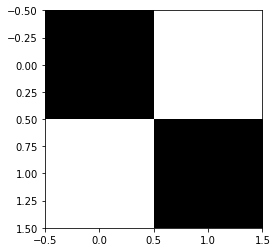

In [4]:
plt.imshow(tiny_img,cmap='gray') #  cmap='gray' argument tells matplotlib to display the image in grayscale
plt.show()

One can also display the image without axis by adding the `plt.axis('off')` option:

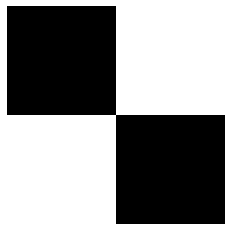

In [5]:
plt.imshow(tiny_img,cmap='gray') #  cmap='gray' argument tells matplotlib to display the image in grayscale
plt.axis('off')
plt.show()

**Quiz:** Build a $8\times 8$ chessboard. Can you do this  without explicitly writing the matrix?

#### Grayscale images

To encode grayscale images we will consider matrices with float entries in the $[0,1]$ interval. Each entry encodes the *intensity* of a pixel. Entries close to $0$ are dark while entries close to $1$ are bright. 

Here is  a toy example of a grayscale 2D array:

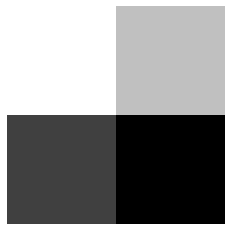

In [6]:
gray_tiny_img=np.array([[1,0.75],[0.25,0]])

plt.imshow(gray_tiny_img,cmap='gray')
plt.axis('off')
plt.show()

#### Converting an image into a matrix

 Matplotlib's `plt.imread()` function takes the file location as input, and convert it into 3D NumPy array. Why 3D? Because color images have more parameters, but we won't go into details.  We will simply use the `rgb2gray` method from the `skimage` library
 to convert the image into grayscale:

In [8]:
chaplin_color_img=plt.imread('Chaplin_The_Kid.jpg') # Read image file and store it as a 3D array.
from skimage.color import rgb2gray # Import funtion from library for converting to grayscale
chaplin=rgb2gray(chaplin_color_img) # Convert image into grayscale and save it as chaplin

We can print a snapshot of `chaplin` NumPy array.

In [9]:
print(chaplin)

[[0.42352941 0.42352941 0.42352941 ... 0.72941176 0.74117647 0.75294118]
 [0.42352941 0.41960784 0.41176471 ... 0.72156863 0.72941176 0.74117647]
 [0.42352941 0.41176471 0.39607843 ... 0.71372549 0.72156863 0.72941176]
 ...
 [0.99607843 0.99607843 0.99607843 ... 0.8745098  0.86666667 0.90980392]
 [0.99607843 0.99607843 0.99607843 ... 0.8745098  0.87058824 0.88627451]
 [0.99607843 0.99607843 0.99607843 ... 0.87058824 0.8745098  0.86666667]]


This matrix does not tell us much about the image. Let us use the `plt.imshow` function to look at it.

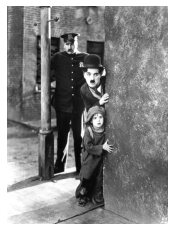

In [10]:
plt.imshow(chaplin,cmap='gray')
plt.axis('off')
plt.show()

**Quiz:** Convert your favourite image into a NumPy 2D array.

### 5.4.3  Shape and size

To obtain the shape (dimensions) of a matrix one can use the `.shape` attribute:

In [18]:
A=np.array([[2,7,6],[9,5,1],[4,3,8]])
print(A.shape)

(3, 3)


In [19]:
B=np.array([
[1, 0, 1, 0, 1, 0, 1],
[0, 1, 1, 0, 0, 1, 1],
[0, 0, 0, 1, 1, 1, 1]
])
print(B.shape)

(3, 7)


The number of entries in a matrix is obtained using the `.size` atribute:

In [20]:
print(A.size)
print(B.size)

9
21


We can now find the dimensions and number of pixels in an image:

In [26]:
print("Chaplin's image has shape", chaplin.shape)
print("Chaplin's image has", chaplin.size, "pixels")

Chaplin's image has shape (2272, 1680)
Chaplin's image has 3816960 pixels


### 5.4.4 Creating 2D arrays using NumPy functions

Many of the methods that we used to create 1D arrays also work for creating 2D arrays. As a
rule of thumb,  we should replace the argument specifying the length the desired 1D array by a tuple specifying its shape.

In [8]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
np.ones((5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [10]:
np.random.random((3,4))

array([[0.77934255, 0.50283304, 0.48136721, 0.01041074],
       [0.61577233, 0.35316723, 0.29220472, 0.81581393],
       [0.9571848 , 0.43583912, 0.13772508, 0.11130462]])

With  `np.eye(n)` we can create an $n\times n$ identity matrix with 1s in its diagonal and 0s in the remaining entries:

In [20]:
id_10=np.eye(10)
print(id_10)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### 5.4.5 Accessing values of a 2D array

One can access to single elements from a matrix by using a comma-separated tuple of indices. It important to remember that rows and columns are ordered starting from 0. Consider the following 2D array:

We see next how to access the values of an specific 2D array:

In [4]:
A=np.array(
    [[2,7,6],
     [9,5,1],
     [4,3,8]])

We access its (0,0) entry as follows

In [82]:
A[0,0]

2

and we access its (1,2) entry

In [84]:
A[1,2]

1

In general, we access the $(i,j)$ entry of a 2D array by adding the `[i,j]` notation after the name of array. Remember,  Python labels colums and rows starting from $0$.

Also, since a 2D array is a list of lists, we can alternatively access as follows:

In [5]:
A[1][2]

1

We can also modify a single entry as follows:

In [87]:
A[1,1]=0
print(A)

[[2 7 6]
 [9 0 1]
 [4 3 8]]


### 5.4.6  Slicing

Sometimes it is convenient to restrict a 2D array into a subarray. For this we will use the following accessing mechanism described in the following template:

``
array[start_row:end_row, start_column:end_column]
``

In words this reads as accessing the subarray of `array` from row `start_row` to `end_row` (including `start_row` but excluding `end_row`) and from column `start_column` to `end_column` (including `start_column` but excluding `end_column`). Let us look at a few examples:

In [88]:
print(A)

[[2 7 6]
 [9 0 1]
 [4 3 8]]


In [90]:
print( A[0:2,0:2] )

[[2 7]
 [9 0]]


In [92]:
print(A[0:2,0:3])

[[2 7 6]
 [9 0 1]]


To slice as before we can also use the following

In [93]:
print(A[0:2,:])

[[2 7 6]
 [9 0 1]]


so Python reads ':' as ....

We can also use slicing to modify entries of a matrix...


In [95]:
A[0:2,0:2]=np.eye(2)
print(A)

[[1 0 6]
 [0 1 1]
 [4 3 8]]


...or even we can let all the entries of a subarray to be the same:

In [99]:
A[1:3,1:3]=23
print(A)

[[ 1  0  6]
 [ 0 23 23]
 [ 4 23 23]]


**Quiz:** How do you set all the entries of the first column of `A` to be all 1s.

### 5.4.7 Viewing and copying subarrays

We can define a variable to be a subarray of a given 2D array:

In [102]:
A=np.array(
    [[2,7,6],
     [9,5,1],
     [4,3,8]])

B=A[:2,:2]
print(B)

[[2 7]
 [9 5]]


We remark that `B` "views" a subarray of `A` and not a copy of a subarray of `A`. For instance, modifying an entry of `B` also modifies an entry of `A`.

In [105]:
B[1,1]=100
print(A)

[[  2   7   6]
 [  9 100   1]
 [  4   3   8]]


HERE WE SHOW HOW TO USE THE COPY METHOD

**Quiz:** Write a program that crops `chaplin` and shows only Chaplin's face as output. (Hint: Remove `plt.axis('off')` )


### 5.4.8 Concatenatenating and stacking

We concatenate 1D arrays using the `np.concatenate(a,b)` method:

In [9]:
a=np.array([1,2,3])
b=np.array([4,5,6])
c=np.array([7,8,9])
np.concatenate([a,b,c])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

We can also use this method to concatenate 2D arrays, however, for this one needs to specify the axis:



In [11]:
identity=np.eye(3)
A=np.array([[2,7,6],[9,5,1],[4,3,8]])

In [13]:
np.concatenate([identity,A], axis=0)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [2., 7., 6.],
       [9., 5., 1.],
       [4., 3., 8.]])

In [14]:
np.concatenate([identity,A], axis=1)

array([[1., 0., 0., 2., 7., 6.],
       [0., 1., 0., 9., 5., 1.],
       [0., 0., 1., 4., 3., 8.]])

As the axis approach could be very confusing, it is adviced to use the `np.vstack` and `np.hstack` for this:

In [18]:
np.vstack([identity,A])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [2., 7., 6.],
       [9., 5., 1.],
       [4., 3., 8.]])

In [19]:
np.hstack([identity,A])

array([[1., 0., 0., 2., 7., 6.],
       [0., 1., 0., 9., 5., 1.],
       [0., 0., 1., 4., 3., 8.]])